<a href="https://colab.research.google.com/github/shrutee2000/Mini-Project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.55 s (started: 2021-03-29 09:24:58 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 2.54 s (started: 2021-03-29 09:25:01 +00:00)


In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 126 ms (started: 2021-03-29 09:25:03 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("horses",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://weneedfun.com/wp-content/uploads/2016/07/Beautiful-Horse-Breeds-171-1024x733.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://media.moddb.com/cache/images/mods/1/36/35494/thumb_620x2000/Swadian_Conquistador.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.nintendolife.com/screenshots/54777/large.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.obnoxiousantiques.com/wp-content/uploads/2014/02/carousel-horse-small-pole--e1393545901871.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.wpwood3.com/wp-content/gallery/owls/wpr1144-edit.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://wallpapershome.com/images/wallpapers/horse-1080x1920-cute-animals-5k-14707.jpeg
[%] File Downloaded !

[%] Downloading Image #7 from https://hative.com/wp-content/uploads/2014/03/animal-paper-roll-crafts/14-homemade-butterfl

In [ ]:
downloader.download("red tomatoes",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://img.thrfun.com/img/022/530/greentomatoes_l4.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.italianstore.ca/wp-content/uploads/2017/08/red-beets.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.eatwell101.com/wp-content/uploads/2017/08/chicken-in-the-slow-cooker.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.redrobinpa.com/wp-content/uploads/2011/02/121006.1_ChiliChiliCheeseburger_hr-website-e1454941456921.jpg
[!] Issue getting: http://www.redrobinpa.com/wp-content/uploads/2011/02/121006.1_ChiliChiliCheeseburger_hr-website-e1454941456921.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1091)>
[%] Downloading Image #4 from https://www.eatwell101.com/wp-content/uploads/2016/10/Zucchini-Noodles-Recipe-1.jpg
[%] File Downloaded !

[%] Downloading Im

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/images'
CATEGORIES=['horses','red tomatoes']

for category in CATEGORIES:
  class_num= CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array= imread(os.path.join(path,img))
    img_resized= resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target= np.array(target)
images= np.array(images)    



time: 24 s (started: 2021-03-29 09:26:19 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 14.8 ms (started: 2021-03-29 09:26:43 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 29.6 s (started: 2021-03-29 09:26:43 +00:00)


In [ ]:
y_pred= clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

time: 80.9 ms (started: 2021-03-29 09:27:13 +00:00)


In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 3.91 ms (started: 2021-03-29 09:27:13 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.3 ms (started: 2021-03-29 09:27:13 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.8333333333333334

time: 4.46 ms (started: 2021-03-29 09:27:13 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[8, 0],
       [3, 7]])

time: 5.1 ms (started: 2021-03-29 09:27:13 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 45 ms (started: 2021-03-29 09:27:13 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 14 ms (started: 2021-03-29 09:27:13 +00:00)


Enter urlhttps://upload.wikimedia.org/wikipedia/commons/8/89/Tomato_je.jpg
(1497, 1800, 3)
PREDICTED OUTPUT:red tomatoes


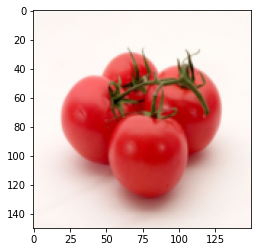

time: 6.81 s (started: 2021-03-29 09:31:34 +00:00)


In [ ]:
#testing a new image
flat_data =[]
url= input('Enter url')
img= imread(url)
img_resized= resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out= model.predict(flat_data)
y_out= CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')